In [30]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
data_frame = pd.read_csv("T40.1_BWM.txt",delimiter="\t")
pd.set_option('display.max_rows', None)

We replace "Unreliable" by NaN.

In [32]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [33]:
CM2b_2020 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2w_2020 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2b_2019 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2w_2019 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2b_2018 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2018)]
CM2w_2018 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2018)]
CM2b_2017 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2017)]
CM2w_2017 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2017)]

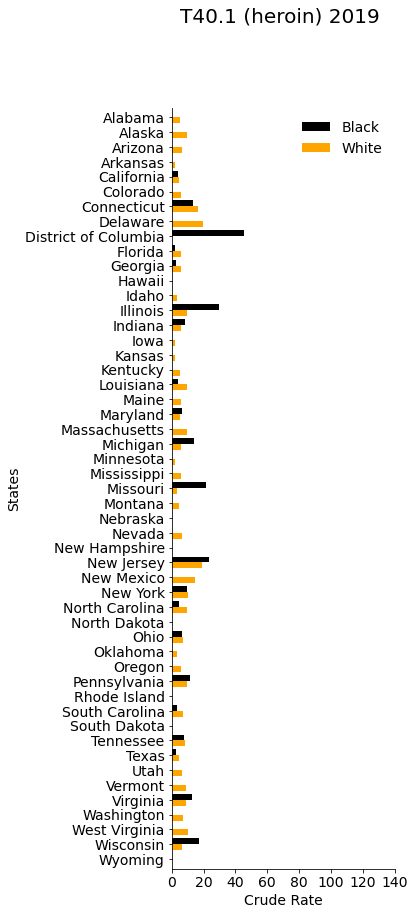

In [34]:
left19 = pd.DataFrame({"States": CM2w_2019["State"].astype(str), "White": CM2w_2019["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM2b_2019["State"].astype(str), "Black": CM2b_2019["Crude Rate"].astype(float)})

result19 = pd.merge(left19, right19, on = "States")
result219 = pd.merge(left19, right19, how = 'right')

left20 = pd.DataFrame({"States": CM2w_2020["State"].astype(str), "White": CM2w_2020["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM2b_2020["State"].astype(str), "Black": CM2b_2020["Crude Rate"].astype(float)})

result20 = pd.merge(left20, right20, on = "States")
result220 = pd.merge(left20, right20, how = 'right')

result19.loc[::-1]

df19 = pd.DataFrame(result19.loc[::-1])
df19.index = df19['States']
ax = df19.plot(kind='barh', figsize=(4, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=14)
plt.suptitle('T40.1 (heroin) 2019', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0,140))
plt.savefig('T40.1_2019_Race.svg')


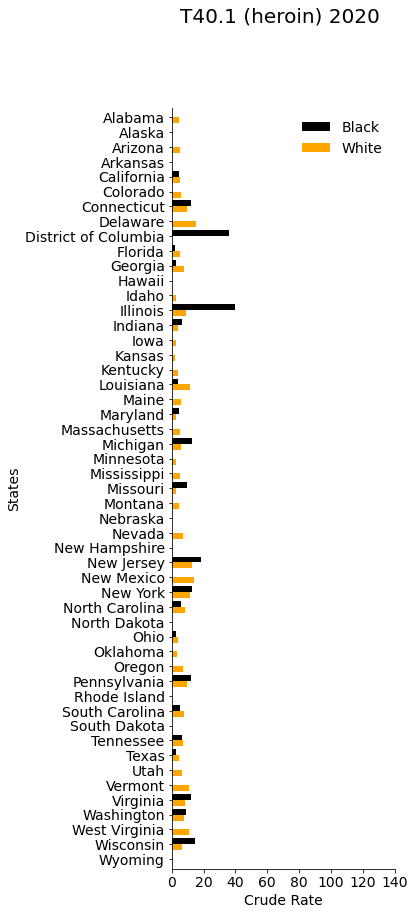

In [35]:
df20 = pd.DataFrame(result20.loc[::-1])
df20.index = df20['States']
ax2 = df20.plot(kind='barh', figsize=(4, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=14)
plt.suptitle('T40.1 (heroin) 2020', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 14)

plt.xlim((0,140))
plt.savefig('T40.1_2020_Race.svg')